In [3]:
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/human.faa  -out human.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/mouse.faa  -out mouse.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/zebrafish.faa  -out zebrafish.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/drosophila.faa  -out drosophila.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/c.elegans.faa  -out c.elegans.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/ciliate.faa  -out ciliate.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/yeast.faa  -out yeast.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/methanocaldococcus.faa  -out methanocaldococcus.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/thermococcus.faa  -out thermococcus.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/e.coli.faa  -out e.coli.blast  -outfmt 7
! blastp  -query protein_setd2.fasta -db /mnt/storage/project_2023/proteomes/tuberculosis.faa  -out tuberculosis.blast  -outfmt 7

In [4]:
hists = ['h2a', 'h2b', 'h3', 'h4']
orgs = ['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', 'ciliate', 'yeast', 'methanocaldococcus', 'thermococcus', 'e.coli', 'tuberculosis']

for hist in hists:
    for org in orgs:
        ! blastp  -query {hist}.fasta -db /mnt/storage/project_2023/proteomes/{org}.faa -evalue 1e-10 -outfmt 6 -out {hist}_{org}.blast

In [6]:
! pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 75.6 MB/s eta 0:00:00


In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame(columns=['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', \
                           'ciliate', 'yeast', 'methanocaldococcus', 'thermococcus', 'e.coli', 'tuberculosis'])

df.loc['setd2'] = [0.0, 0.0, 0.0, 1.29e-73, 1.60e-48, 1.18e-53, 5.11e-54, 0.45, 0.72, 0.063, 0.43]

df

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
setd2,0.0,0.0,0.0,1.290000e-73,1.600000e-48,1.180000e-53,5.110000e-54,0.45,0.72,0.063,0.43


In [35]:
for hist in hists:
    for org in orgs:
        try:
            cur = pd.read_csv(hist + '_' + org + '.blast', sep='\t', header=None)
        except:
            df.loc[hist, org] = 1
        else:
            if len(cur) > 0: 
                df.loc[hist, org] = cur.iloc[0, 10]
            else:
                df.loc[hist, org] = 1

df
            

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
setd2,0.000000e+00,0.000000e+00,0.000000e+00,1.290000e-73,1.600000e-48,1.180000e-53,5.110000e-54,0.45,0.72,6.300000e-02,0.43
h2a,0.000000e+00,0.000000e+00,0.000000e+00,1.230000e-43,2.710000e-45,3.440000e-46,1.070000e-45,1.00,1.00,1.180000e-21,1.00
h2b,2.780000e-88,1.950000e-88,1.860000e-83,2.750000e-60,5.980000e-66,4.620000e-51,1.010000e-60,1.00,1.00,1.000000e+00,1.00
h3,2.190000e-96,1.540000e-96,1.770000e-95,9.390000e-96,4.460000e-94,8.410000e-86,3.310000e-87,1.00,1.00,1.000000e+00,1.00
h4,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,1.00,1.00,1.000000e+00,1.00


In [36]:
import numpy as np

In [49]:
log_df = pd.DataFrame(-np.log10(df.values), columns=['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', \
                                                   'ciliate', 'yeast', 'methanocaldococcus', 'thermococcus', 'e.coli', 'tuberculosis'])
log_df[log_df > 300] = 300
log_df.index = df.index

log_df

/tmp/ipykernel_3816032/3408729011.py:1: RuntimeWarning: divide by zero encountered in log10
  log_df = pd.DataFrame(-np.log10(df.values), columns=['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', \


,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
setd2,300.000000,300.000000,300.000000,72.889410,47.795880,52.928118,53.291579,0.346787,0.142668,1.200659,0.366532
h2a,300.000000,300.000000,300.000000,42.910095,44.567031,45.463442,44.970616,-0.000000,-0.000000,20.928118,-0.000000
h2b,87.555955,87.709965,82.730487,59.560667,65.223299,50.335358,59.995679,-0.000000,-0.000000,-0.000000,-0.000000
h3,95.659556,95.812479,94.752027,95.027334,93.350665,85.075204,86.480172,-0.000000,-0.000000,-0.000000,-0.000000
h4,66.962574,67.119186,67.946922,67.095826,67.211125,44.707744,51.966576,-0.000000,-0.000000,-0.000000,-0.000000


In [50]:
df.to_csv(path_or_buf='results.csv')
log_df.to_csv(path_or_buf='log_results.csv')

In [51]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot: >

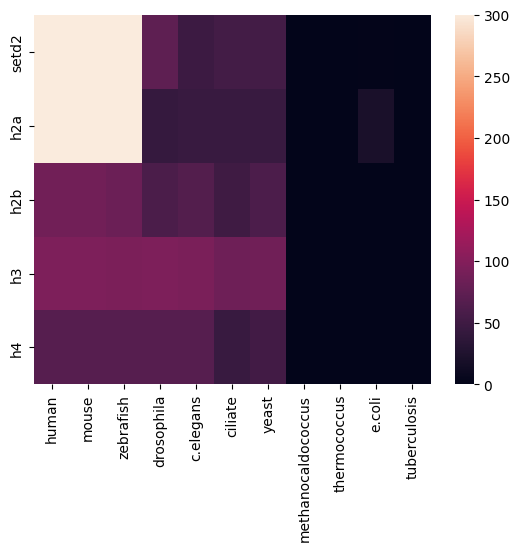

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(log_df)